In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Iris.csv')

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


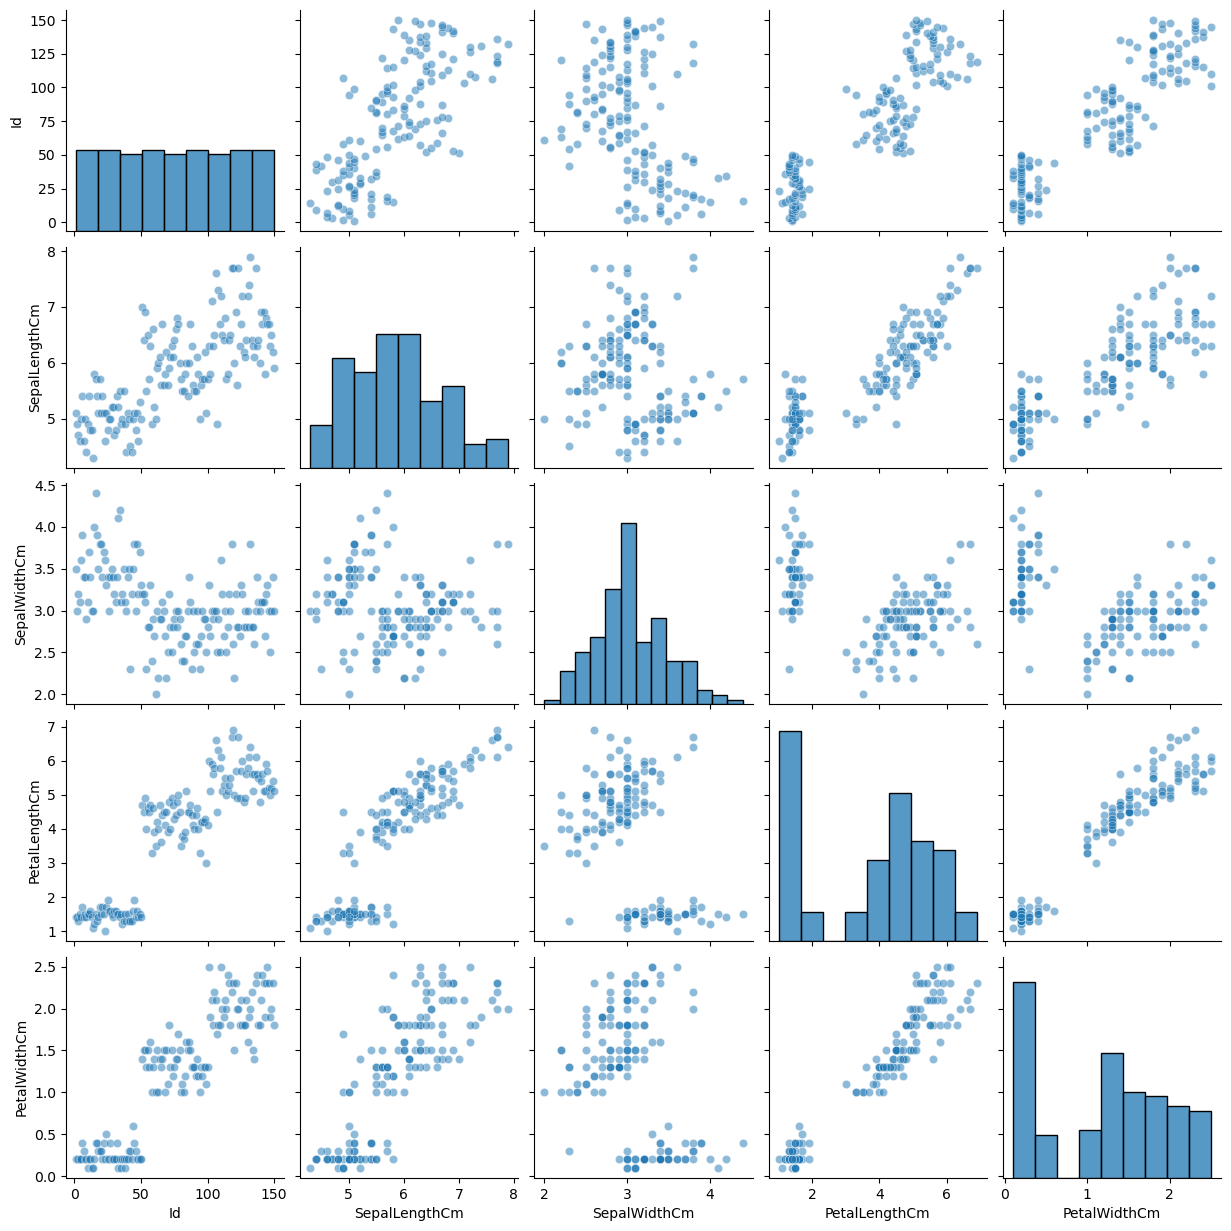

In [4]:
sns.pairplot(df,kind='scatter',plot_kws={'alpha':0.5})

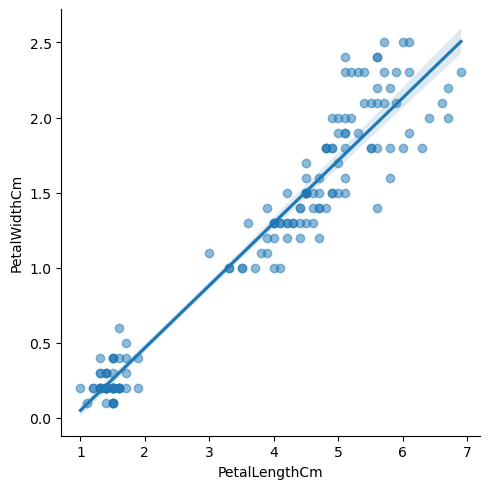

In [5]:
sns.lmplot(x='PetalLengthCm',
          y='PetalWidthCm',
          scatter_kws={'alpha':0.5},
          data=df)

In [6]:
from sklearn.model_selection import train_test_split
x= df[['PetalLengthCm', 'PetalWidthCm']]
y=df['Species']
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
x_train,x_test,y_train,y_test=train_test_split(x,y_encoded,test_size=0.3,random_state=42)

In [7]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)
p=model.predict(x_test)

print(label_encoder.inverse_transform(p))

['Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-setosa' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-virginica'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa']


In [8]:
from sklearn.metrics import accuracy_score
print('accuracy score of model:',accuracy_score(y_test,p))

print('percentage of model:',accuracy_score(y_test,p)*100)

accuracy score of model: 1.0
percentage of model: 100.0


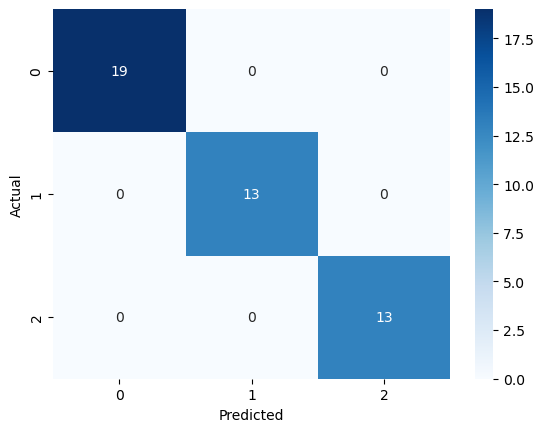

In [9]:
from sklearn.metrics import confusion_matrix
c = confusion_matrix(y_test, p)
sns.heatmap(c, annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [10]:
from sklearn.metrics import classification_report

print(classification_report(y_test, p, target_names=label_encoder.classes_))


                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



In [11]:
from sklearn.tree import DecisionTreeClassifier
dmodel=DecisionTreeClassifier()
dmodel.fit(x_train,y_train)
a=dmodel.predict(x_test)
from sklearn.metrics import accuracy_score
print('accuracy of decision tree:',accuracy_score(y_test,a))

accuracy of decision tree: 1.0


In [12]:
from sklearn.ensemble import RandomForestClassifier
rmodel=RandomForestClassifier()
rmodel.fit(x_train,y_train)
a=rmodel.predict(x_test)
from sklearn.metrics import accuracy_score
print('accuracy of random tree:',accuracy_score(y_test,a))

accuracy of random tree: 1.0
